In [92]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import matplotlib.pyplot as plt

import src.utils as utils

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
data_list1 = [
    os.path.join("/home/schiavazza/data/hpe/fault_button/osai/fault_button", "s1_v1"),
    os.path.join("/home/schiavazza/data/hpe/fault_button/osai/fault_button", "s1_v2"),
    os.path.join("/home/schiavazza/data/hpe/fault_button/osai/fault_button", "s2_v1"),
    os.path.join("/home/schiavazza/data/hpe/fault_button/osai/fault_button", "s2_v2")
]
data_list2 = [
    os.path.join("/home/schiavazza/data/hpe/fault_button/april_exp/binary/long", "button1"),
    os.path.join("/home/schiavazza/data/hpe/fault_button/april_exp/binary/long", "button2"),
    os.path.join("/home/schiavazza/data/hpe/fault_button/april_exp/binary/long", "button3"),
    os.path.join("/home/schiavazza/data/hpe/fault_button/april_exp/binary/long", "button4")
]
data_list3 = [
    # f"/home/schiavazza/data/hpe/fault_button/APRIL/exp01/data",
    f"/home/schiavazza/data/hpe/fault_button/APRIL/exp02/data",
    f"/home/schiavazza/data/hpe/fault_button/APRIL/exp03/data",
]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
thresh_multipliers = np.linspace(0.5, 1.5, 20)

In [94]:
scale = 1.0
dataset_tres = 0.01
n = 20
tmpPlotter = utils.Plotter(data_list1[0])
base_thresh = tmpPlotter.find_threshold(scale)
base_thresh_ls = base_thresh * thresh_multipliers

total_diff = np.empty((n, ), dtype='object')
total_missed = np.empty((n, ), dtype='object')
total_false = np.empty((n, ), dtype='object')

for path in data_list1:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_thresh(base_thresh_ls, scale, dataset_tres)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff1 = np.zeros((n,), dtype=float)
std_diff1 = np.zeros((n,), dtype=float)

u_false1 = np.zeros((n,), dtype=float)
std_false1 = np.zeros((n,), dtype=float)

u_missed1 = np.zeros((n,), dtype=float)
std_missed1 = np.zeros((n,), dtype=float)


for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff1[i] = np.nanmean(tmp)
    std_diff1[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false1[i] = np.nanmean(tmp)
    std_false1[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed1[i] = np.nanmean(tmp)
    std_missed1[i] = np.nanstd(tmp)

importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1/info.log
Threshold: 10049.199999999999, base threshold: 11.737525696131563
importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1/info.log


100%|██████████| 20/20 [00:05<00:00,  3.79it/s]
/home/schiavazza/code/EDPR-APRIL/fault_button/eventrate_test/src/utils.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/home/schiavazza/code/EDPR-APRIL/fault_button/eventrate_test/src/utils.py:522: RuntimeWarning: Mean of empty slice
  means = np.empty((len(scales), len(base_thresh_ls)))
/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v2
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v2/info.log


100%|██████████| 20/20 [00:04<00:00,  4.01it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v1/info.log


100%|██████████| 20/20 [00:03<00:00,  5.83it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v2
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v2/info.log


100%|██████████| 20/20 [00:02<00:00,  7.12it/s]


In [95]:
scale = 3.0
dataset_tres = 0.01
n = 20
tmpPlotter = utils.Plotter(data_list2[0])
base_thresh = tmpPlotter.find_threshold(scale)
base_thresh_ls = base_thresh * thresh_multipliers

total_diff = np.empty((n, ), dtype='object')
total_missed = np.empty((n, ), dtype='object')
total_false = np.empty((n, ), dtype='object')

for path in data_list2:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_thresh(base_thresh_ls, scale, dataset_tres)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff2 = np.zeros((n,), dtype=float)
std_diff2 = np.zeros((n,), dtype=float)

u_false2 = np.zeros((n,), dtype=float)
std_false2 = np.zeros((n,), dtype=float)

u_missed2 = np.zeros((n,), dtype=float)
std_missed2 = np.zeros((n,), dtype=float)


for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff2[i] = np.nanmean(tmp)
    std_diff2[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false2[i] = np.nanmean(tmp)
    std_false2[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed2[i] = np.nanmean(tmp)
    std_missed2[i] = np.nanstd(tmp)

importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button1
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button1/info.log
Threshold: 20717.899999999998, base threshold: 6.744108072916665
importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button1
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button1/info.log


100%|██████████| 20/20 [00:07<00:00,  2.73it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button2
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button2/info.log


100%|██████████| 20/20 [00:07<00:00,  2.66it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button3
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button3/info.log


100%|██████████| 20/20 [00:09<00:00,  2.01it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button4
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button4/info.log


100%|██████████| 20/20 [00:09<00:00,  2.15it/s]


In [103]:
scale = 0.5
dataset_tres = 0.01
n = 20
tmpPlotter = utils.Plotter(data_list3[0])
base_thresh = tmpPlotter.find_threshold(scale)
base_thresh_ls = base_thresh * thresh_multipliers

total_diff = np.empty((n, ), dtype='object')
total_missed = np.empty((n, ), dtype='object')
total_false = np.empty((n, ), dtype='object')

for path in data_list3:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_thresh(base_thresh_ls, scale, dataset_tres)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff3 = np.zeros((n,), dtype=float)
std_diff3 = np.zeros((n,), dtype=float)

u_false3 = np.zeros((n,), dtype=float)
std_false3 = np.zeros((n,), dtype=float)

u_missed3 = np.zeros((n,), dtype=float)
std_missed3 = np.zeros((n,), dtype=float)


for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff3[i] = np.nanmean(tmp)
    std_diff3[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false3[i] = np.nanmean(tmp)
    std_false3[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed3[i] = np.nanmean(tmp)
    std_missed3[i] = np.nanstd(tmp)

importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/APRIL/exp02/data


100%|██████████| 50892/50892 [00:14<00:00, 3632.55it/s]


Examining info.log: /home/schiavazza/data/hpe/fault_button/APRIL/exp02/data/info.log
Threshold: 1243.8999999999999, base threshold: 4.991172458069175
importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/APRIL/exp02/data


100%|██████████| 50892/50892 [00:13<00:00, 3738.68it/s]


Examining info.log: /home/schiavazza/data/hpe/fault_button/APRIL/exp02/data/info.log


100%|██████████| 20/20 [00:00<00:00, 114.38it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/APRIL/exp03/data


100%|██████████| 38970/38970 [00:09<00:00, 4087.06it/s]


Examining info.log: /home/schiavazza/data/hpe/fault_button/APRIL/exp03/data/info.log


100%|██████████| 20/20 [00:00<00:00, 127.01it/s]
/home/schiavazza/code/EDPR-APRIL/fault_button/eventrate_test/src/utils.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/home/schiavazza/code/EDPR-APRIL/fault_button/eventrate_test/src/utils.py:522: RuntimeWarning: Mean of empty slice
  means = np.empty((len(scales), len(base_thresh_ls)))
/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


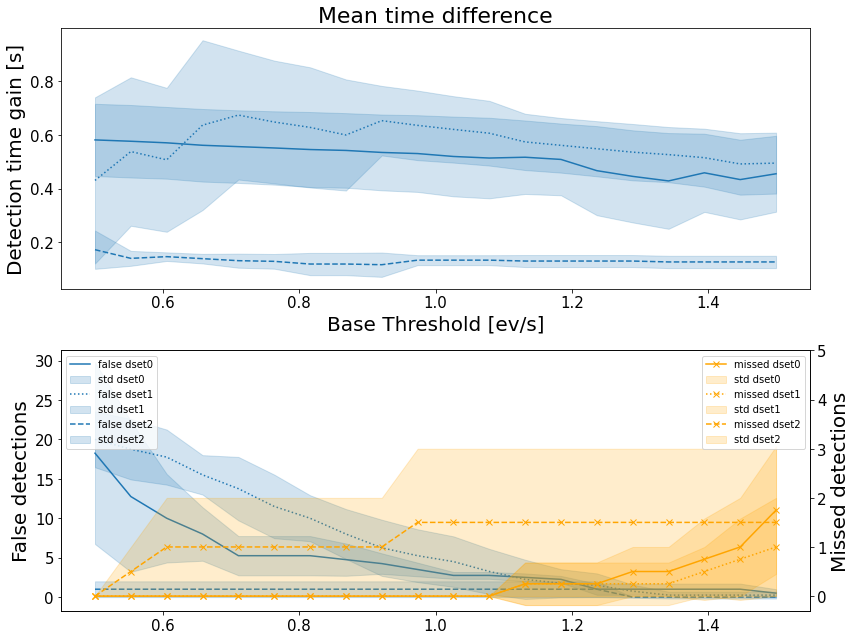

In [106]:
fig, axs = plt.subplots(2, 1, figsize=(12, 9))

axs2 = axs[1].twinx()

u_diffs = [u_diff1, u_diff2, u_diff3]
std_diffs = [std_diff1, std_diff2, std_diff3]
u_falses = [u_false1, u_false2, u_false3]
std_falses = [std_false1, std_false2, std_false3]
u_misseds = [u_missed1, u_missed2, u_missed3]
std_misseds = [std_missed1, std_missed2, std_missed3]
style = ["solid", "dotted", "dashed"]

for i in range(3):
    u_diff = u_diffs[i]
    std_diff = std_diffs[i]
    u_false = u_falses[i]
    std_false = std_falses[i]
    u_missed = u_misseds[i]
    std_missed = std_misseds[i]

    axs[0].plot(thresh_multipliers, u_diff, color='#1f77b4', linestyle=style[i])
    axs[0].fill_between(thresh_multipliers, u_diff-std_diff, u_diff+std_diff, alpha=0.2, color='#1f77b4')
    # axs[0].set_xticks(thresh_multipliers)

    axs[0].set_xlabel("Base Threshold [ev/s]", fontsize=20)
    axs[0].set_ylabel("Detection time gain [s]", fontsize=20)
    axs[0].set_title("Mean time difference", fontsize=22);

    axs[1].plot(thresh_multipliers, u_false, label=f"false dset{i}", linestyle=style[i], color="#1f77b4")
    axs[1].fill_between(thresh_multipliers, u_false-std_false, u_false+std_false, alpha=0.2, label=f"std dset{i}", color='#1f77b4')
    axs[1].set_ylabel("False detections", fontsize=20)

    
    axs2.plot(thresh_multipliers, u_missed,marker="x", label=f"missed dset{i}", linestyle=style[i], color="orange")
    axs2.fill_between(thresh_multipliers, u_missed-std_missed, u_missed+std_missed, alpha=0.2, label=f"std dset{i}", color="orange")
    axs2.set_ylabel("Missed detections", fontsize=20)
    axs2.set_ylim([-0.1*(3), 5])
    # ax.set_xticks(thresh_multipliers)
    # ax.set_yticks(n_detections)
    # ymax = max(max(u_false + std_false), max(u_missed + std_missed))
    # ax.set_ylim([-0.5, ymax + 0.5])
    # ax.set_xscale('log')
    # ax.set_xlabel("Base Threshold [ev/s]", fontsize=20)
    # # ax.set_ylabel("number of detections", fontsize=20)
    # ax.set_title("Detections", fontsize=22);
    axs[1].legend(loc="upper left")
    axs2.legend(loc="upper right")
plt.tight_layout()
plt.savefig("/home/schiavazza/Pictures/fault_button/stats_thresh.png")

The effects of changing the thresholds seems to be consistent between datasets. Each scneario has a preferred threshold value that gives optimal results. Note that the roi dimension is different for every datasets depending on the scene.

The value of the optimal threshold is different for every dataset, but every dataset has the same pattern in the results. Higher thresholds result in more missed detections, but fewer false detections. The ideal threshold minimizes false and missed detections. 

There isn't single value that can be used for every scenario, but if the 

In [113]:
scales = np.linspace(50.0, 500, 20)
dataset_tres = 0.01
base_thresh = 9

total_diff = np.empty((n, ), dtype='object')
total_missed = np.empty((n, ), dtype='object')
total_false = np.empty((n, ), dtype='object')

for path in data_list1:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_scale(base_thresh, scales, dataset_tres)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff1 = np.zeros((n,), dtype=float)
std_diff1 = np.zeros((n,), dtype=float)

u_false1 = np.zeros((n,), dtype=float)
std_false1 = np.zeros((n,), dtype=float)

u_missed1 = np.zeros((n,), dtype=float)
std_missed1 = np.zeros((n,), dtype=float)


for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff1[i] = np.nanmean(tmp)
    std_diff1[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false1[i] = np.nanmean(tmp)
    std_false1[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed1[i] = np.nanmean(tmp)
    std_missed1[i] = np.nanstd(tmp)


scales = np.linspace(50.0, 500, 20)
dataset_tres = 0.01
base_thresh = 7

total_diff = np.empty((n, ), dtype='object')
total_missed = np.empty((n, ), dtype='object')
total_false = np.empty((n, ), dtype='object')

for path in data_list2:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_scale(base_thresh, scales, dataset_tres)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff2 = np.zeros((n,), dtype=float)
std_diff2 = np.zeros((n,), dtype=float)

u_false2 = np.zeros((n,), dtype=float)
std_false2 = np.zeros((n,), dtype=float)

u_missed2 = np.zeros((n,), dtype=float)
std_missed2 = np.zeros((n,), dtype=float)


for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff2[i] = np.nanmean(tmp)
    std_diff2[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false2[i] = np.nanmean(tmp)
    std_false2[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed2[i] = np.nanmean(tmp)
    std_missed2[i] = np.nanstd(tmp)


scales = np.linspace(50.0, 500, 20)
dataset_tres = 0.01
base_thresh = 1.5

total_diff = np.empty((n, ), dtype='object')
total_missed = np.empty((n, ), dtype='object')
total_false = np.empty((n, ), dtype='object')

for path in data_list3:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_scale(base_thresh, scales, dataset_tres)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff3 = np.zeros((n,), dtype=float)
std_diff3 = np.zeros((n,), dtype=float)

u_false3 = np.zeros((n,), dtype=float)
std_false3 = np.zeros((n,), dtype=float)

u_missed3 = np.zeros((n,), dtype=float)
std_missed3 = np.zeros((n,), dtype=float)


for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff3[i] = np.nanmean(tmp)
    std_diff3[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false3[i] = np.nanmean(tmp)
    std_false3[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed3[i] = np.nanmean(tmp)
    std_missed3[i] = np.nanstd(tmp)




importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1/info.log


100%|██████████| 20/20 [01:08<00:00,  3.45s/it]
/home/schiavazza/code/EDPR-APRIL/fault_button/eventrate_test/src/utils.py:481: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  differences_ls = np.array(differences_ls)


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v2
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v2/info.log


100%|██████████| 20/20 [00:59<00:00,  2.98s/it]
/home/schiavazza/code/EDPR-APRIL/fault_button/eventrate_test/src/utils.py:482: RuntimeWarning: Mean of empty slice
  mean_times = np.array([np.nanmean(d) for d in differences_ls])
/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v1/info.log


100%|██████████| 20/20 [00:56<00:00,  2.82s/it]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v2
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v2/info.log


100%|██████████| 20/20 [00:40<00:00,  2.00s/it]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button1
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button1/info.log


100%|██████████| 20/20 [00:17<00:00,  1.15it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button2
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button2/info.log


100%|██████████| 20/20 [00:16<00:00,  1.21it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button3
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button3/info.log


100%|██████████| 20/20 [00:20<00:00,  1.05s/it]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button4
Examining info.log: /home/schiavazza/data/hpe/fault_button/april_exp/binary/long/button4/info.log


100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/APRIL/exp02/data


100%|██████████| 50892/50892 [00:34<00:00, 1476.87it/s]


Examining info.log: /home/schiavazza/data/hpe/fault_button/APRIL/exp02/data/info.log


100%|██████████| 20/20 [00:06<00:00,  2.97it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/APRIL/exp03/data


100%|██████████| 38970/38970 [00:21<00:00, 1785.44it/s]


Examining info.log: /home/schiavazza/data/hpe/fault_button/APRIL/exp03/data/info.log


100%|██████████| 20/20 [00:04<00:00,  4.49it/s]


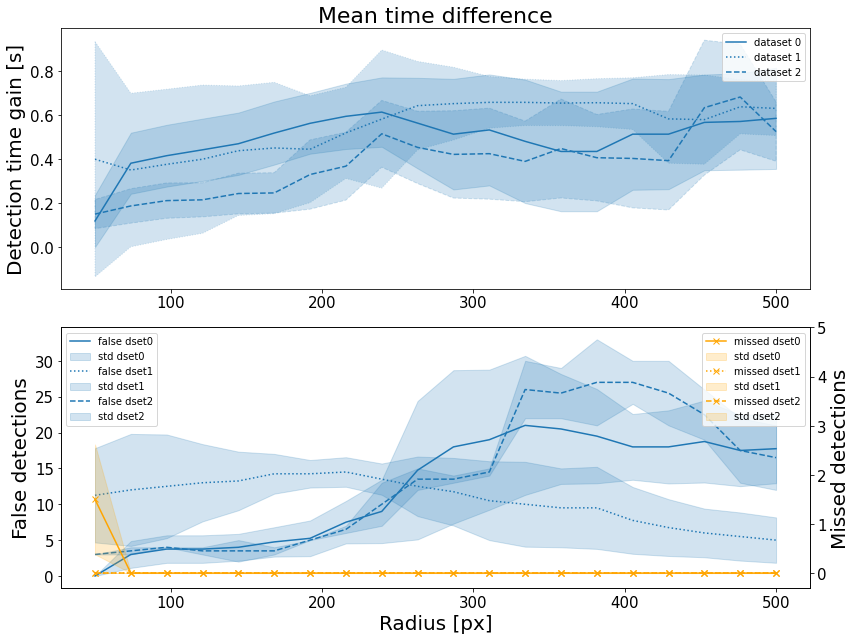

In [115]:

fig, axs = plt.subplots(2, 1, figsize=(12, 9))

axs2 = axs[1].twinx()

u_diffs = [u_diff1, u_diff2, u_diff3]
std_diffs = [std_diff1, std_diff2, std_diff3]
u_falses = [u_false1, u_false2, u_false3]
std_falses = [std_false1, std_false2, std_false3]
u_misseds = [u_missed1, u_missed2, u_missed3]
std_misseds = [std_missed1, std_missed2, std_missed3]
style = ["solid", "dotted", "dashed"]

for i in range(3):
    u_diff = u_diffs[i]
    std_diff = std_diffs[i]
    u_false = u_falses[i]
    std_false = std_falses[i]
    u_missed = u_misseds[i]
    std_missed = std_misseds[i]

    axs[0].plot(scales, u_diff, label=f"dataset {i}", color="#1f77b4", linestyle=style[i])
    axs[0].fill_between(scales, u_diff-std_diff, u_diff+std_diff, alpha=0.2, color='#1f77b4', linestyle=style[i])
    # axs[0].set_xticks(scales)

    axs[1].set_xlabel("Radius [px]", fontsize=20)
    axs[0].set_ylabel("Detection time gain [s]", fontsize=20)
    axs[0].set_title("Mean time difference", fontsize=22);
    axs[0].legend()

    axs[1].plot(scales, u_false, label=f"false dset{i}", color="#1f77b4", linestyle=style[i])
    axs[1].fill_between(scales, u_false-std_false, u_false+std_false, alpha=0.2, label=f"std dset{i}", color="#1f77b4")
    axs[1].set_ylabel("False detections", fontsize=20)

    
    axs2.plot(scales, u_missed, marker='x', label=f"missed dset{i}", linestyle=style[i], color="orange")
    axs2.fill_between(scales, u_missed-std_missed, u_missed+std_missed, alpha=0.2, label=f"std dset{i}", color="orange")
    axs2.set_ylabel("Missed detections", fontsize=20)
    axs2.set_ylim([-0.1*(3), 5])
    # ax.set_xticks(scales)
    # ax.set_yticks(n_detections)
    # ymax = max(max(u_false + std_false), max(u_missed + std_missed))
    # ax.set_ylim([-0.5, ymax + 0.5])
    # ax.set_xscale('log')
    # ax.set_xlabel("Base Threshold [ev/s]", fontsize=20)
    # # ax.set_ylabel("number of detections", fontsize=20)
    # ax.set_title("Detections", fontsize=22);
    axs[1].legend(loc="upper left")
    axs2.legend(loc="upper right")
plt.tight_layout()
plt.savefig("/home/schiavazza/Pictures/fault_button/stats_scale.png")

The false and missed detection graph for the second dataset looks very different when compared to the other datasets. 
More specifically, in the other datasets the number of false detection decreases with the dimension of the roi considered. Smaller rois give better results in the other two datasets. 

In the second dataset, larger rois seem to perform better compared to smaller ones. The threshold has been adjusted for each dataset. The different results are likely caused by the different scenes. 

In the other two datsets the image area where the button is located does not overlap with the working area of the person. In this datasets, the operator might move and do significant work in the space behind the button. When the detection area is kept small this causes more frequent false detections. Having a bigger detection area increases the robostness in this cases. On the other hand a fast movement in an area relatively more distant from the button might also trigger false detections.

In [ ]:
scale = 1.0
dataset_tres_ls = [10**(-x) for x in np.linspace(1, 4, 20)]
base_thresh = 9

tmpPlotter = utils.Plotter(data_list1[0])
base_thresh = tmpPlotter.find_threshold(scale)
base_thresh_ls = base_thresh * thresh_multipliers

total_diff = np.empty((n, ), dtype='object')
total_missed = np.empty((n, ), dtype='object')
total_false = np.empty((n, ), dtype='object')

for path in data_list1:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_tres(base_thresh, scale, dataset_tres_ls)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff1 = np.zeros((n,), dtype=float)
std_diff1 = np.zeros((n,), dtype=float)

u_false1 = np.zeros((n,), dtype=float)
std_false1 = np.zeros((n,), dtype=float)

u_missed1 = np.zeros((n,), dtype=float)
std_missed1 = np.zeros((n,), dtype=float)


for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff1[i] = np.nanmean(tmp)
    std_diff1[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false1[i] = np.nanmean(tmp)
    std_false1[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed1[i] = np.nanmean(tmp)
    std_missed1[i] = np.nanstd(tmp)

scale = 3.0
dataset_tres_ls = [10**(-x) for x in np.linspace(1, 4, 20)]
base_thresh = 7
tmpPlotter = utils.Plotter(data_list2[0])
base_thresh = tmpPlotter.find_threshold(scale)
base_thresh_ls = base_thresh * thresh_multipliers

total_diff = np.empty((n, ), dtype='object')
total_missed = np.empty((n, ), dtype='object')
total_false = np.empty((n, ), dtype='object')

for path in data_list2:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_tres(base_thresh, scale, dataset_tres_ls)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff2 = np.zeros((n,), dtype=float)
std_diff2 = np.zeros((n,), dtype=float)

u_false2 = np.zeros((n,), dtype=float)
std_false2 = np.zeros((n,), dtype=float)

u_missed2 = np.zeros((n,), dtype=float)
std_missed2 = np.zeros((n,), dtype=float)


for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff2[i] = np.nanmean(tmp)
    std_diff2[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false2[i] = np.nanmean(tmp)
    std_false2[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed2[i] = np.nanmean(tmp)
    std_missed2[i] = np.nanstd(tmp)

scale = 0.7
dataset_tres_ls = [10**(-x) for x in np.linspace(1, 4, 20)]
base_thresh = 1.5

tmpPlotter = utils.Plotter(data_list3[0])
base_thresh = tmpPlotter.find_threshold(scale)
base_thresh_ls = base_thresh * thresh_multipliers

total_diff = np.empty((n, ), dtype='object')
total_missed = np.empty((n, ), dtype='object')
total_false = np.empty((n, ), dtype='object')

for path in data_list3:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_tres(base_thresh, scale, dataset_tres_ls)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff3 = np.zeros((n,), dtype=float)
std_diff3 = np.zeros((n,), dtype=float)

u_false3 = np.zeros((n,), dtype=float)
std_false3 = np.zeros((n,), dtype=float)

u_missed3 = np.zeros((n,), dtype=float)
std_missed3 = np.zeros((n,), dtype=float)


for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff3[i] = np.nanmean(tmp)
    std_diff3[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false3[i] = np.nanmean(tmp)
    std_false3[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed3[i] = np.nanmean(tmp)
    std_missed3[i] = np.nanstd(tmp)

In [ ]:

fig, axs = plt.subplots(2, 1, figsize=(12, 9))

axs2 = axs[1].twinx()

u_diffs = [u_diff1, u_diff2, u_diff3]
std_diffs = [std_diff1, std_diff2, std_diff3]
u_falses = [u_false1, u_false2, u_false3]
std_falses = [std_false1, std_false2, std_false3]
u_misseds = [u_missed1, u_missed2, u_missed3]
std_misseds = [std_missed1, std_missed2, std_missed3]
style = ["solid", "dotted", "dashed"]

for i in range(3):
    u_diff = u_diffs[i]
    std_diff = std_diffs[i]
    u_false = u_falses[i]
    std_false = std_falses[i]
    u_missed = u_misseds[i]
    std_missed = std_misseds[i]

    axs[0].plot(thresh_multipliers, u_diff, color='#1f77b4', linestyle=style[i])
    axs[0].fill_between(thresh_multipliers, u_diff-std_diff, u_diff+std_diff, alpha=0.2, color='#1f77b4')
    # axs[0].set_xticks(thresh_multipliers)

    axs[0].set_xlabel("Base Threshold [ev/s]", fontsize=20)
    axs[0].set_ylabel("Detection time gain [s]", fontsize=20)
    axs[0].set_title("Mean time difference", fontsize=22);

    axs[1].plot(thresh_multipliers, u_false, label=f"false dset{i}", linestyle=style[i], color="#1f77b4")
    axs[1].fill_between(thresh_multipliers, u_false-std_false, u_false+std_false, alpha=0.2, label=f"std dset{i}", color='#1f77b4')
    axs[1].set_ylabel("False detections", fontsize=20)

    
    axs2.plot(thresh_multipliers, u_missed,marker="x", label=f"missed dset{i}", linestyle=style[i], color="orange")
    axs2.fill_between(thresh_multipliers, u_missed-std_missed, u_missed+std_missed, alpha=0.2, label=f"std dset{i}", color="orange")
    axs2.set_ylabel("Missed detections", fontsize=20)
    axs2.set_ylim([-0.1*(3), 5])
    # ax.set_xticks(thresh_multipliers)
    # ax.set_yticks(n_detections)
    # ymax = max(max(u_false + std_false), max(u_missed + std_missed))
    # ax.set_ylim([-0.5, ymax + 0.5])
    # ax.set_xscale('log')
    # ax.set_xlabel("Base Threshold [ev/s]", fontsize=20)
    # # ax.set_ylabel("number of detections", fontsize=20)
    # ax.set_title("Detections", fontsize=22);
    axs[1].legend(loc="upper left")
    axs2.legend(loc="upper right")
plt.tight_layout()
plt.savefig("/home/schiavazza/Pictures/fault_button/stats_thresh.png")